# Unsupervised Classification With Autoencoder
## Arda Mavi
[Arda Mavi - GitHub](https://github.com/ardamavi)

### Summary:
In this project, we use autoencoders for classification as unsupervised machine learning algorithms with Deep Learning.<br/>
#### Give the 'images' and 'number of the class', then let the program do the rest!

# First we look up what is autoencoder:
[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
## Example of image denoising:

In [1]:
# Arda Mavi
# Unsupervised Classification With Autoencoder

In [2]:
# Import
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Getting Dataset:
def get_dataset():
    (X, Y), (X_test, Y_test) = mnist.load_data()
    
    X = X.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    X = np.reshape(X, (len(X), 28, 28, 1))
    X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
    
    # Add noise:
    noise_factor = 0.4
    X_train_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape) 
    X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)
    
    return X, X_test, Y, Y_test, X_train_noisy, X_test_noisy

X, X_test, Y, Y_test, X_train_noisy, X_test_noisy = get_dataset()

Training shape: (60000, 28, 28, 1)
60000 sample, 28 x 28 size grayscale image.

Test shape: (10000, 28, 28, 1)
10000 sample, 28 x 28 size grayscale image.

Examples:


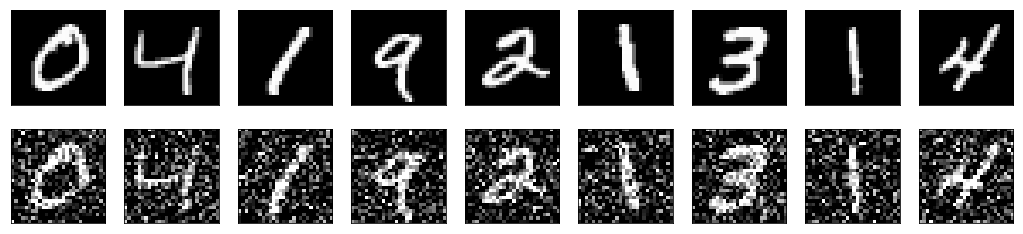

In [4]:
# About Dataset:
print('Training shape:', X.shape)
print(X.shape[0], 'sample,',X.shape[1] ,'x',X.shape[2] ,'size grayscale image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size grayscale image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(X_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# Output Shape: 4x4x8

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# Output Shape: 28x28x1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [6]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [7]:
# Training Model:
epochs = 3
batch_size = 100
autoencoder.fit(X_train_noisy, X, batch_size=batch_size, epochs=epochs, validation_data=(X_test_noisy, X_test), shuffle=True, callbacks=checkpoints)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 81s - loss: 0.2583 - val_loss: 0.1994
Epoch 2/3
60000/60000 [==============================] - 83s - loss: 0.1842 - val_loss: 0.1728
Epoch 3/3
60000/60000 [==============================] - 83s - loss: 0.1656 - val_loss: 0.1586


In [8]:
decoded_imgs = autoencoder.predict(X_test_noisy)

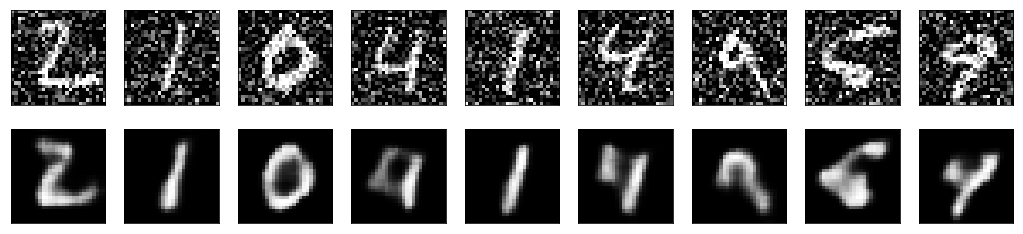

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Now we use autoencoder for unsupervised classification:

In [10]:
# Describe the number of classes:
num_class = 10

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Activation, Lambda, Reshape, Flatten
from keras.models import Model
from keras import backend as K

# Custom classifier function:
def classifier_func(x):
    return x+x*K.one_hot(K.argmax(x, axis=1), num_classes=num_class)

In [11]:
# Deep Learning Model:

inputs = Input(shape=(28, 28, 1))
#Encoder:
conv_1 = Conv2D(32, (3,3), strides=(1,1))(inputs)
act_1 = Activation('relu')(conv_1)
maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_1)

conv_2 = Conv2D(64, (3,3), strides=(1,1), padding='same')(maxpool_1)
act_2 = Activation('relu')(conv_2)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_2)
# Output Shape: 6x6x64
    
flat_1 = Flatten()(maxpool_2)

fc_1 = Dense(256)(flat_1)
act_3 = Activation('relu')(fc_1)

fc_2 = Dense(128)(act_3)
act_4 = Activation('relu')(fc_2)

fc_3 = Dense(num_class)(act_4)

act_class = Lambda(classifier_func, output_shape=(num_class,))(fc_3)
# Output Shape: 10

#Decoder:
fc_4 = Dense(256)(act_class)
act_5 = Activation('relu')(fc_4)

fc_5 = Dense(2304)(act_5)
act_6 = Activation('relu')(fc_5)
reshape_1 = Reshape((6,6,64))(act_6)

upsample_1 = UpSampling2D((2, 2))(reshape_1)
deconv_1 = Conv2DTranspose(64, (3, 3), strides=(1, 1))(upsample_1)
act_7 = Activation('relu')(deconv_1)

upsample_2 = UpSampling2D((2, 2))(act_7)
deconv_2 = Conv2DTranspose(32, (3, 3), strides=(1, 1))(upsample_2)
act_8 = Activation('relu')(deconv_2)

conv_3 = Conv2D(1, (3, 3), strides=(1, 1))(act_8)
act_9 = Activation('sigmoid')(conv_3)
# Output Shape: 28x28x1

autoencoder = Model(inputs, act_9)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [12]:
# Training Model:
epochs = 4
batch_size = 100
autoencoder.fit(X, X, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 400s - loss: 0.2283 - val_loss: 0.1804
Epoch 2/4
60000/60000 [==============================] - 394s - loss: 0.1758 - val_loss: 0.1811
Epoch 3/4
60000/60000 [==============================] - 400s - loss: 0.1599 - val_loss: 0.1579
Epoch 4/4
60000/60000 [==============================] - 393s - loss: 0.1511 - val_loss: 0.1477


In [13]:
decoded_imgs = autoencoder.predict(X_test)

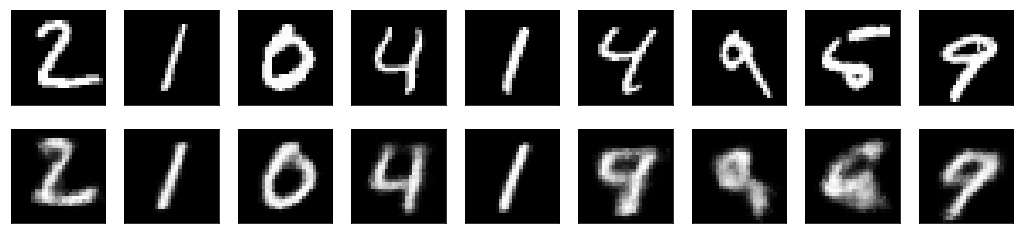

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [15]:
# Split autoencoder:
encoder = Model(inputs, act_class)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

#### Use the code to finding which cluster:
`np.argmax(<encoder_output>, axis=0)`

### Now we look up result:

In [18]:
encode = encoder.predict(X)

class_dict = np.zeros((num_class, num_class))
for i, sample in enumerate(Y):
    class_dict[np.argmax(encode[i], axis=0)][sample] += 1
    
print(class_dict)
    
neuron_class = np.zeros((num_class))
for i in range(num_class):
    neuron_class[i] = np.argmax(class_dict[i], axis=0)

print(neuron_class)

Examples:


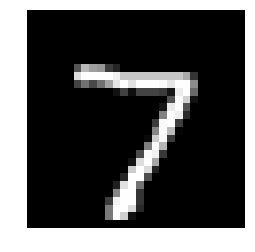

Class: 7 - Model's Output Class: 7.0


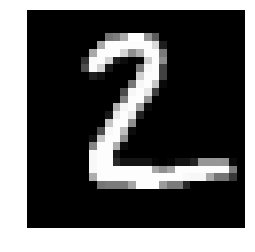

Class: 2 - Model's Output Class: 2.0


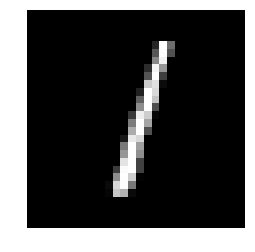

Class: 1 - Model's Output Class: 1.0


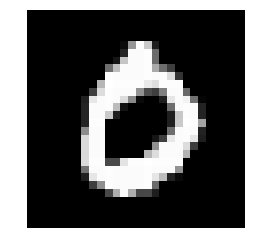

Class: 0 - Model's Output Class: 0.0


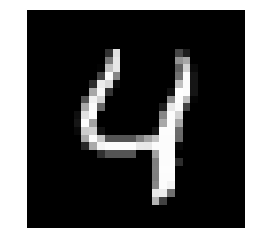

Class: 4 - Model's Output Class: 2.0


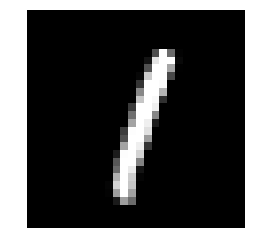

Class: 1 - Model's Output Class: 1.0


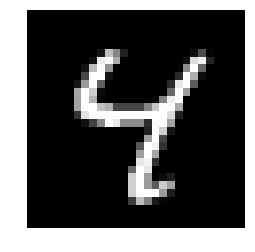

Class: 4 - Model's Output Class: 7.0


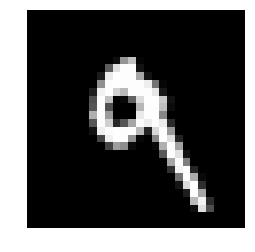

Class: 9 - Model's Output Class: 9.0


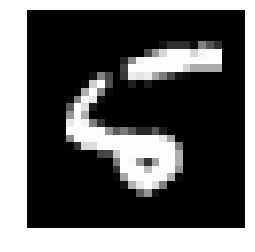

Class: 5 - Model's Output Class: 2.0


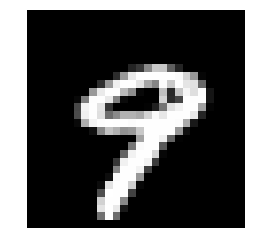

Class: 9 - Model's Output Class: 9.0


In [26]:
encode = encoder.predict(X_test)

predicted = np.argmax(encode, axis=1)
for i, sample in enumerate(predicted):
    predicted[i] = neuron_class[predicted[i]]

comparison = Y_test == predicted
loss = 1 - np.sum(comparison.astype(int))/Y_test.shape[0]

print('Loss:', loss)
print('Examples:')
for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()
    neuron = np.argmax(encode[i], axis=0)
    print('Class:', Y_test[i], '- Model\'s Output Class:', neuron_class[neuron])

### Thats it! Thank you!
#### Still in development